In [ ]:
import pandas as pd
import os
import missingno as msno

In [ ]:
flight_df = pd.read_csv('/content/drive/MyDrive/Flight_delay_prediction/flight_data_full.csv', index_col = 0)
weather_df = pd.read_csv('/content/drive/MyDrive/Flight_delay_prediction/weather_data_full.csv', index_col = 0)

In [ ]:
flight_df.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'FlightDate',
       'OriginAirportID', 'Origin', 'DestAirportID', 'Dest', 'CRSDepTime',
       'DepTime', 'DepDelayMinutes', 'DepDel15', 'CRSArrTime', 'ArrTime',
       'ArrDelayMinutes', 'ArrDel15'],
      dtype='object')

In [ ]:
weather_df.columns

Index(['windspeedKmph', 'winddirDegree', 'weatherCode', 'precipMM',
       'visibility', 'pressure', 'cloudcover', 'DewPointF', 'WindGustKmph',
       'tempF', 'WindChillF', 'humidity', 'date', 'time', 'airport_code'],
      dtype='object')

In [ ]:
weather_df['time']

0            0
1          100
2          200
3          300
4          400
          ... 
263155    1900
263156    2000
263157    2100
263158    2200
263159    2300
Name: time, Length: 263160, dtype: int64

In [ ]:
flight_df['CRSDepTime']

0           745
1           745
2           745
3           745
4           710
           ... 
1851431    1030
1851432    1156
1851433     737
1851434    1638
1851435    1008
Name: CRSDepTime, Length: 1851436, dtype: int64

In [ ]:
flight_df['CRSArrTime']

0          1602
1          1602
2          1602
3          1602
4          1527
           ... 
1851431    1326
1851432    2017
1851433     909
1851434    1747
1851435    1245
Name: CRSArrTime, Length: 1851436, dtype: int64

In [ ]:
flight_df['CRSDepTime'] = pd.to_numeric(flight_df['CRSDepTime'])


In [ ]:
flight_df['CRSDepTime']


0           745
1           745
2           745
3           745
4           710
           ... 
1851431    1030
1851432    1156
1851433     737
1851434    1638
1851435    1008
Name: CRSDepTime, Length: 1851436, dtype: int64

In [ ]:
flight_df['New_time'] = flight_df['CRSDepTime'].apply(lambda time: round(time / 100) * 100)


In [ ]:
flight_df['New_time']

0           700
1           700
2           700
3           700
4           700
           ... 
1851431    1000
1851432    1200
1851433     700
1851434    1600
1851435    1000
Name: New_time, Length: 1851436, dtype: int64

In [ ]:
final_df = pd.merge(flight_df, weather_df, how = "inner", left_on = ["Origin","New_time", "FlightDate"],
              right_on = ["airport_code","time", "date"])

In [ ]:
final_df.shape

(1840277, 33)

<Axes: >

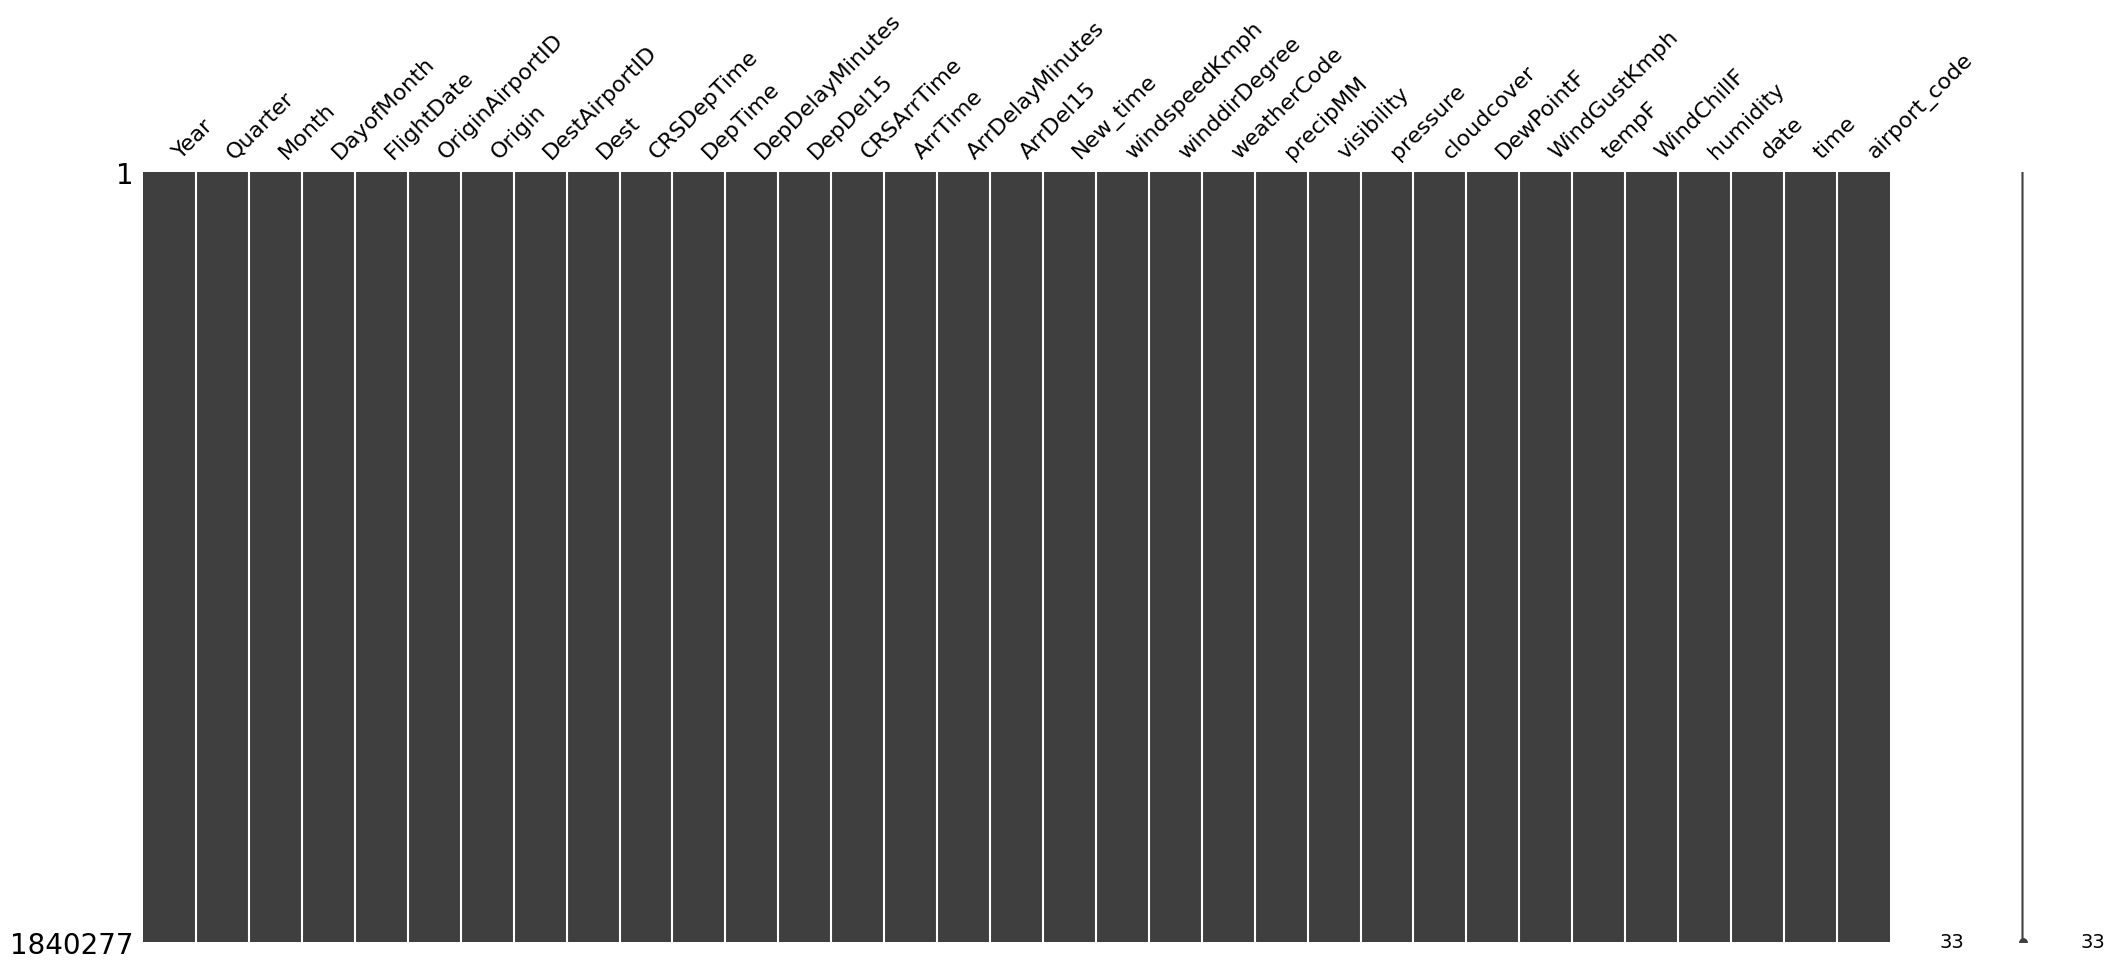

In [ ]:
msno.matrix(final_df)

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1840277 entries, 0 to 1840276
Data columns (total 33 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Year             int64  
 1   Quarter          int64  
 2   Month            int64  
 3   DayofMonth       int64  
 4   FlightDate       object 
 5   OriginAirportID  int64  
 6   Origin           object 
 7   DestAirportID    int64  
 8   Dest             object 
 9   CRSDepTime       int64  
 10  DepTime          float64
 11  DepDelayMinutes  float64
 12  DepDel15         float64
 13  CRSArrTime       int64  
 14  ArrTime          float64
 15  ArrDelayMinutes  float64
 16  ArrDel15         float64
 17  New_time         int64  
 18  windspeedKmph    int64  
 19  winddirDegree    int64  
 20  weatherCode      int64  
 21  precipMM         float64
 22  visibility       int64  
 23  pressure         int64  
 24  cloudcover       int64  
 25  DewPointF        int64  
 26  WindGustKmph     int64  
 27  tempF       

In [ ]:
final_df.to_csv('/content/drive/MyDrive/Flight_delay_prediction/Merged.csv')